# Buisness Objective:

Create a model where the  probability that a business goes bankrupt from different features.


# About Dataset:

The data file contains 7 features about 250 companies
The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).

The dataset is incoprated in one column & in one row, it requires to seperate it and create new columns as mentioned above statement & Then it need to do an Exploratory Data Analysis(EDA),Visualization,Univariate-multivariate analysis,feature scaling(if require).As it is an classfication Project, we're going to use multiple classifcation Models to check which one out of is the best for this dataset.

# Importing Libraries:

In [596]:
import numpy as np 
np.bool = np.bool_
np.int = np.int_
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
from sklearn.metrics import zero_one_loss
from mlxtend.evaluate import bias_variance_decomp
import pickle
import warnings
warnings.filterwarnings('ignore')
import streamlit as st 

from pathlib import Path




In [597]:
import numpy, scipy, sklearn

# Load the Data

In [598]:
df=pd.read_excel('bankruptcy-prevention.xlsx')
print(df)

     industrial_risk;  management_risk;  financial_flexibility;  credibility;  \
0                 0.5               1.0                     0.0           0.0   
1                 0.0               1.0                     0.0           0.0   
2                 1.0               0.0                     0.0           0.0   
3                 0.5               0.0                     0.0           0.5   
4                 1.0               1.0                     0.0           0.0   
..                ...               ...                     ...           ...   
245               0.0               1.0                     1.0           1.0   
246               1.0               1.0                     0.5           1.0   
247               0.0               1.0                     1.0           0.5   
248               1.0               0.0                     0.5           1.0   
249               1.0               0.0                     0.5           0.5   

     competitiveness;  oper

# EDA

In [599]:
df1=df.rename({'industrial_risk;': 'Industrial','management_risk;':'Management','financial_flexibility;':'Financial','credibility;':'Credibility','competitiveness;':'Competitive','operating_risk;':'Operational'},axis=1)
df1.head(5)

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [600]:
df1.tail(5)

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [601]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Industrial   250 non-null    float64
 1   Management   250 non-null    float64
 2   Financial    250 non-null    float64
 3   Credibility  250 non-null    float64
 4   Competitive  250 non-null    float64
 5   Operational  250 non-null    float64
 6   class        250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [602]:
df1.isnull().any()

Industrial     False
Management     False
Financial      False
Credibility    False
Competitive    False
Operational    False
class          False
dtype: bool

In [603]:
df1.isnull().sum()

Industrial     0
Management     0
Financial      0
Credibility    0
Competitive    0
Operational    0
class          0
dtype: int64

In [604]:
df1.shape

(250, 7)

In [605]:
df1[df1.duplicated()].shape

(147, 7)

In [606]:
df1[df1.duplicated()]

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [607]:
df1["class"].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [608]:
df1.describe()

,Industrial,Management,Financial,Credibility,Competitive,Operational
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [609]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'class'.
df1['class']= label_encoder.fit_transform(df1['class'])
  
df1['class'].unique()


array([0, 1])

In [610]:
df1

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [611]:
df1['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

In [612]:
df1.describe()

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* There is no null value present in the dataset which is a good sign.
* Although the all feature are numerical in this dataset but it represent the categories.i.e 0.5= low risk
  So, it's obivious in descriptive statistics you can see mean and standard deviation are equivalent for all feature variable & 
  Target as well.

# Visualization

<Figure size 10800x10800 with 0 Axes>

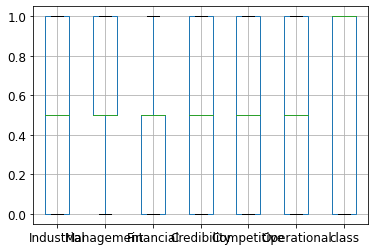

<Figure size 10800x10800 with 0 Axes>

In [613]:
df1.boxplot()
plt.figure(figsize =(150,150))

<Figure size 2160x2160 with 0 Axes>

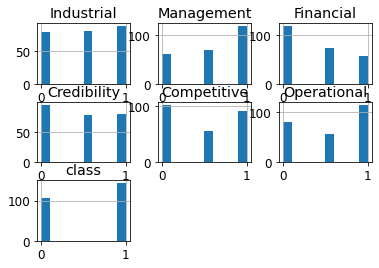

<Figure size 2160x2160 with 0 Axes>

In [614]:
df1.hist()
plt.figure(figsize=(30,30))

No outlier presernt in the dataset.

# univariate, bivariate & multivariate  analysis

Befor doing univarate,bivarate & Multi-variate analysis will check out the each features & Target variable values to understand the praportions of the dataset for each class/risk factor.

In [615]:
df1.apply(lambda x: x.value_counts())

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
0.0,80,62,119,94,103,79,107.0
0.5,81,69,74,77,56,57,NaN
1.0,89,119,57,79,91,114,143.0


<AxesSubplot:ylabel='class'>

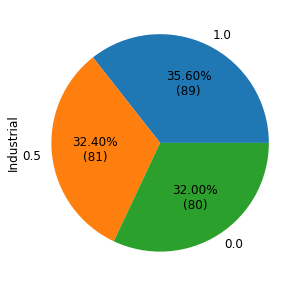

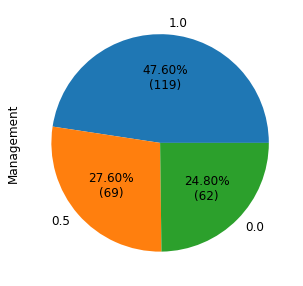

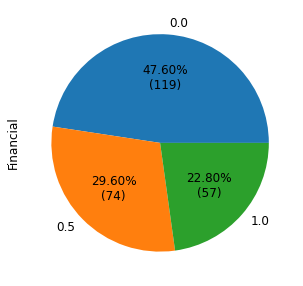

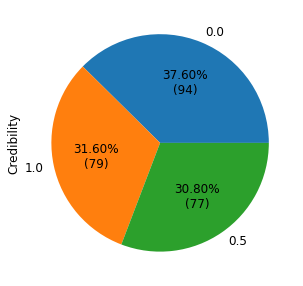

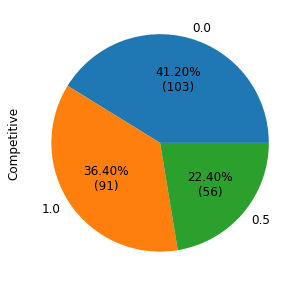

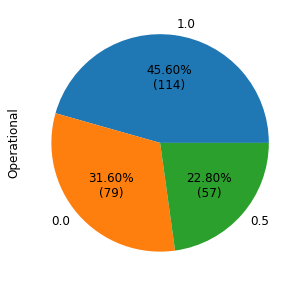

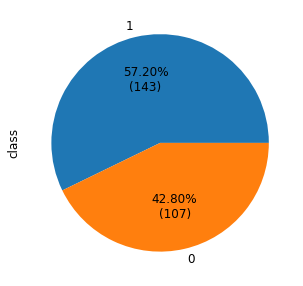

In [616]:
plt.figure(figsize=(5,5))
df1['Industrial'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Industrial'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Management'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Management'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Financial'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Financial'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Credibility'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Credibility'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Competitive'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Competitive'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['Operational'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['Operational'].value_counts().sum())))

plt.figure(figsize=(5,5))
df1['class'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df1['class'].value_counts().sum())))


In [617]:
# Univariate Analysis

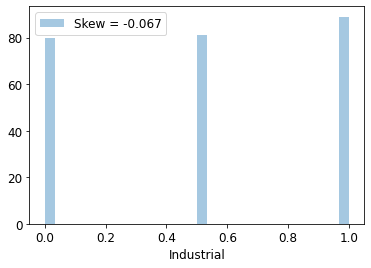

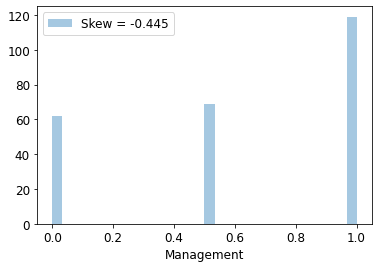

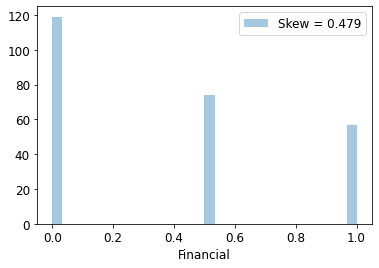

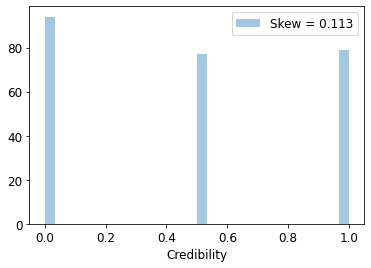

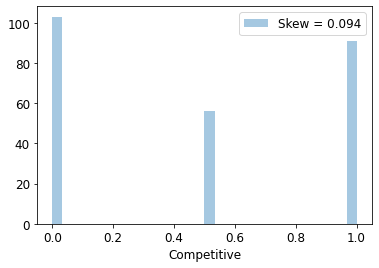

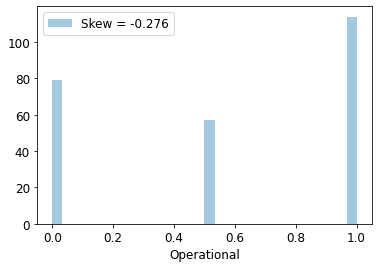

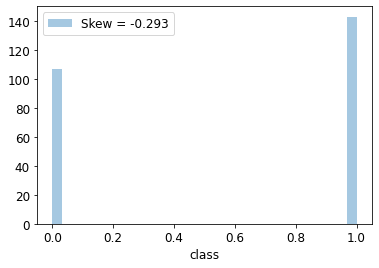

In [618]:
features=[feature for feature in df1.columns if df1[feature].dtypes != 'O']
for feat in features:
    skew = df1[feat].skew()
    sns.distplot(df1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

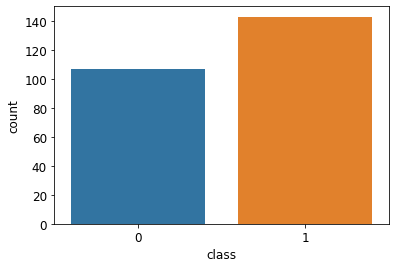

In [619]:
sns.countplot(x=df1['class'])

<AxesSubplot:xlabel='Industrial', ylabel='count'>

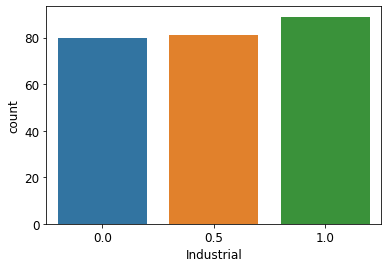

In [620]:
sns.countplot(x=df1['Industrial'])

In [621]:
df1['Industrial'].value_counts()

1.0    89
0.5    81
0.0    80
Name: Industrial, dtype: int64

<AxesSubplot:xlabel='Management', ylabel='count'>

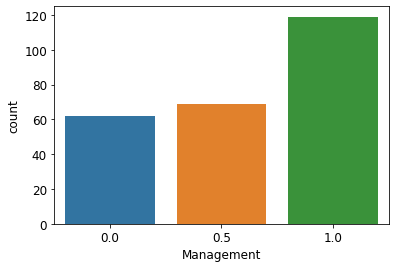

In [622]:
sns.countplot(x=df1['Management'])

<AxesSubplot:xlabel='Financial', ylabel='count'>

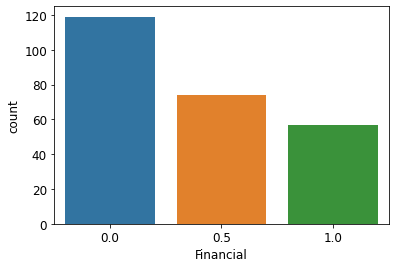

In [623]:
sns.countplot(x=df1['Financial'])

<AxesSubplot:xlabel='Credibility', ylabel='count'>

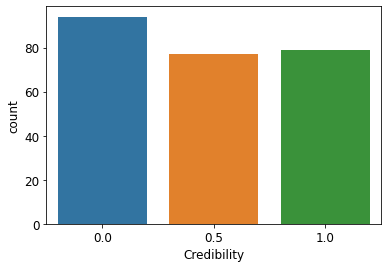

In [624]:
sns.countplot(x=df1['Credibility'])

<AxesSubplot:xlabel='Competitive', ylabel='count'>

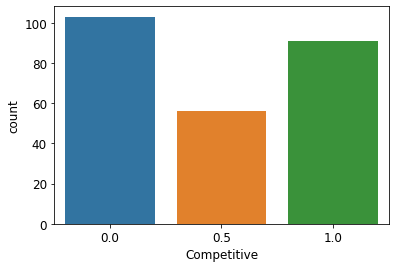

In [625]:
sns.countplot(x=df1['Competitive'])

<AxesSubplot:xlabel='Operational', ylabel='count'>

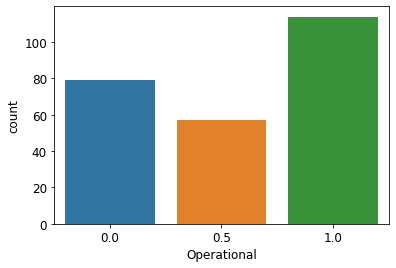

In [626]:
sns.countplot(x=df1['Operational'])

Short analysis of the values present in the dataset Through visualization :

* 	  0 which is belong to low-risk category have highest numbers present in " Financial" (119) & lowest is 62 in "Management".

*	  0.5 which is belong to low-risk category have the highest numbers present in "Industrial" category (81) lowest is  
      56(Competitive)  
      
* 	1 which is the high-risk category which have maximum values available in "Management'(119) & minimum of 57 in "Financial".


* 	 Class, which is a target variable of the data, made into two part bankruptcy which is belong to "1" & "2" for non- 
     bankrptcy Class.  
     You can see the non-bankruptcy have the high numbers with bankruptcy in comparison which is true, as there might be 
     strict jurisdiction, laws enforced by the government could be the reason behind it.



In [627]:
# Bivariate plots
#Features and Target relation

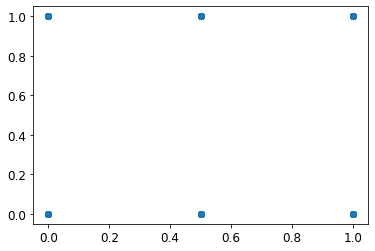

In [628]:
plt.scatter(x="Industrial",y="class",data=df1) 

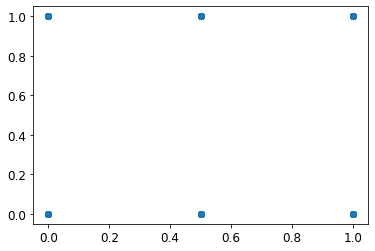

In [629]:
plt.scatter(x="Management",y="class",data=df1) 

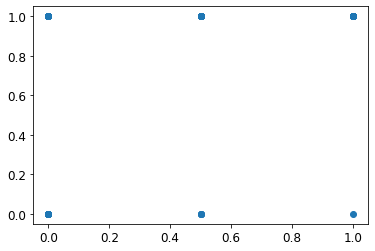

In [630]:
plt.scatter(x="Financial",y="class",data=df1) 

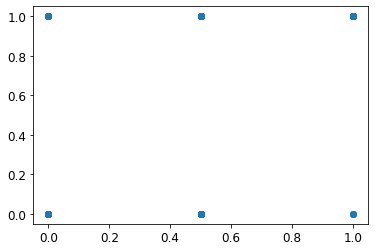

In [631]:
plt.scatter(x="Credibility",y="class",data=df1) 

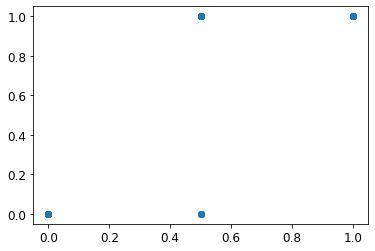

In [632]:
plt.scatter(x="Competitive",y="class",data=df1) 

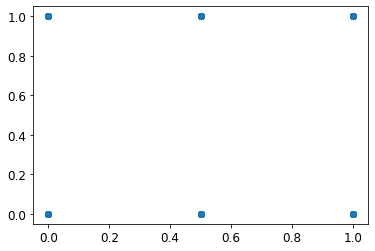

In [633]:
plt.scatter(x="Operational",y="class",data=df1) 

<AxesSubplot:xlabel='Industrial', ylabel='count'>

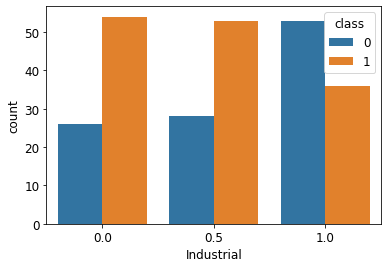

In [634]:
sns.countplot(df1['Industrial'],
              hue=df1['class'])

In [635]:
# Let's check how many are "Industrial risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Industrial', 'class']].apply(pd.Series.value_counts)

,Industrial,class
0.0,80,107.0
0.5,81,NaN
1.0,89,143.0


<AxesSubplot:xlabel='Management', ylabel='count'>

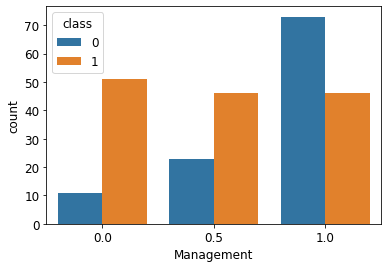

In [636]:
sns.countplot(df1['Management'],
              hue=df1['class'])

In [637]:
# Let's check how many are "Management risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Management', 'class']].apply(pd.Series.value_counts)

,Management,class
0.0,62,107.0
0.5,69,NaN
1.0,119,143.0


<AxesSubplot:xlabel='Financial', ylabel='count'>

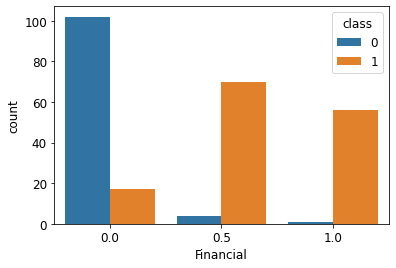

In [638]:
sns.countplot(df1['Financial'],
              hue=df1['class'])

In [639]:
# Let's check how many are "Finacial risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Financial', 'class']].apply(pd.Series.value_counts)

,Financial,class
0.0,119,107.0
0.5,74,NaN
1.0,57,143.0


<AxesSubplot:xlabel='Credibility', ylabel='count'>

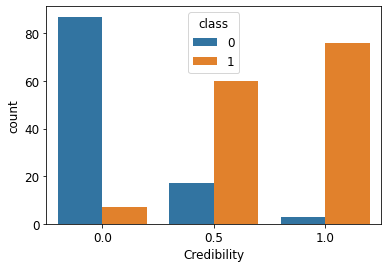

In [640]:
sns.countplot(df1['Credibility'],
              hue=df1['class'])

In [641]:
# Let's check how many are "Credibility risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Credibility', 'class']].apply(pd.Series.value_counts)

,Credibility,class
0.0,94,107.0
0.5,77,NaN
1.0,79,143.0


<AxesSubplot:xlabel='Competitive', ylabel='count'>

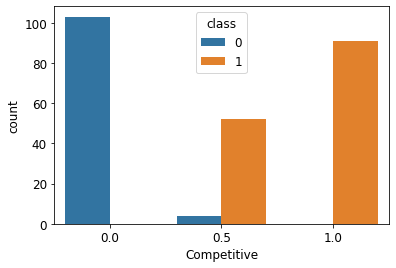

In [642]:
sns.countplot(df1['Competitive'],
              hue=df1['class'])

In [643]:
# Let's check how many are "Competitive risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Competitive', 'class']].apply(pd.Series.value_counts)

,Competitive,class
0.0,103,107.0
0.5,56,NaN
1.0,91,143.0


<AxesSubplot:xlabel='Operational', ylabel='count'>

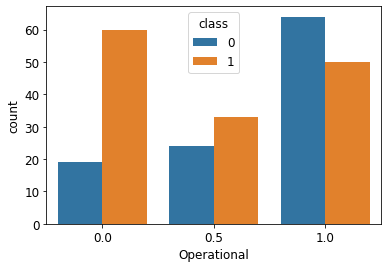

In [644]:
sns.countplot(df1['Operational'],
              hue=df1['class'])

In [645]:
# Let's check how many are "Opreational risk" class belongs to  1(High Risk),0.5(Medium Risk) & 0(Low Risk)

df1[['Operational', 'class']].apply(pd.Series.value_counts)

,Operational,class
0.0,79,107.0
0.5,57,NaN
1.0,114,143.0


Observation of Bivarate Analysis:
*   Through Scatter plot haven't seen any lineraty between features and Target.
*   Industrial,Management,operation are the features who have the maximum numbers of high risk factor associated with 
    bankruptcy.

*   While the finacial feature have the lowest numbers of low risk factor associated with bankruptcy.

# Multivariate Analysis
 proceed by drawing a pairplot to visually examine the correlation between the variables.

<Figure size 576x576 with 0 Axes>

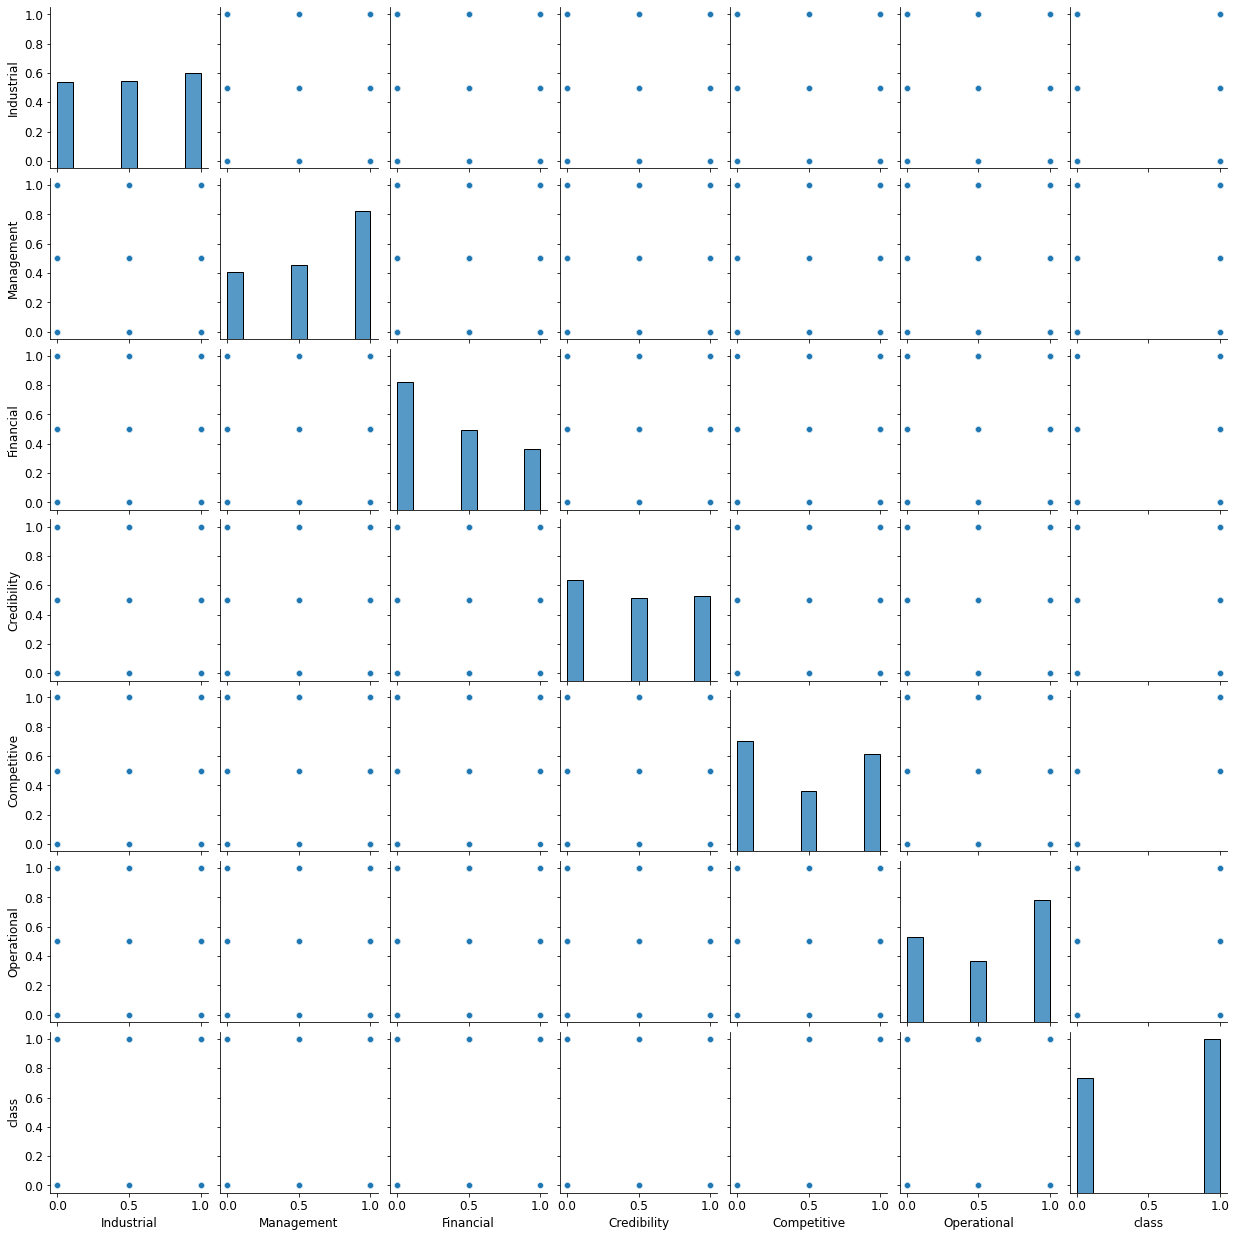

In [646]:
plt.figure(figsize=(8,8))
sns.pairplot(df1, palette='coolwarm')
plt.show()

# Correlation

In [647]:
df1.corr()

,Industrial,Management,Financial,Credibility,Competitive,Operational,class
Industrial,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
Management,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
Financial,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
Credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
Competitive,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
Operational,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


In [648]:
df1.corr()['class']

Industrial    -0.227823
Management    -0.370838
Financial      0.751020
Credibility    0.755909
Competitive    0.899452
Operational   -0.279786
class          1.000000
Name: class, dtype: float64

<AxesSubplot:>

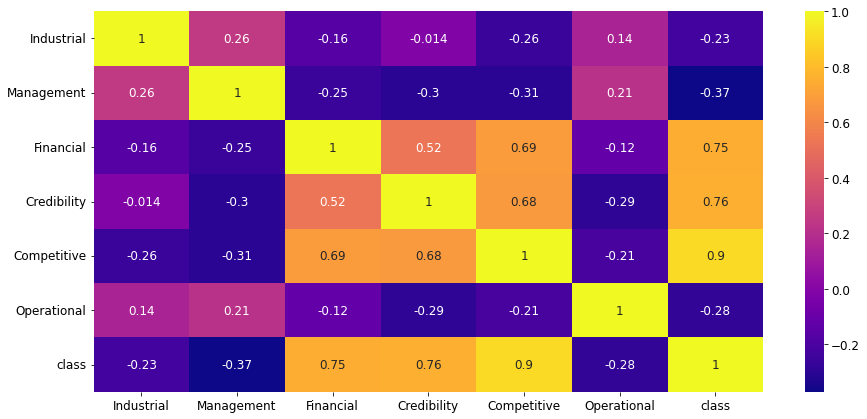

In [649]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(),annot=True,cmap='plasma')     # Heat map correlation

<AxesSubplot:>

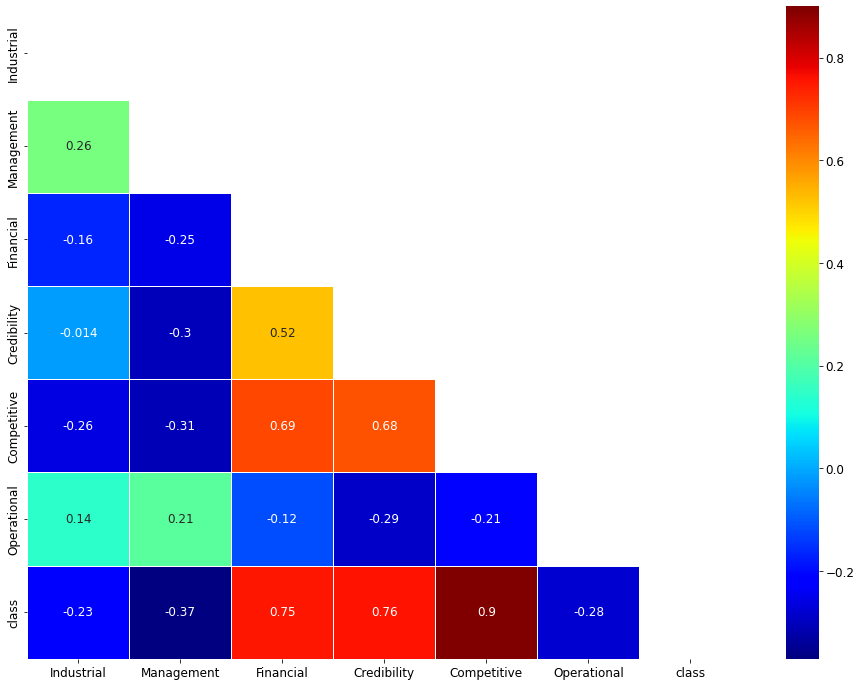

In [650]:
# Heatmap - Correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df1.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Observation  of Multivariate analysis & Correation :
* To check the feature to featurs & Feature to target relation,have plotted pair plot but unfortunately it doesn't seen any  
  linear connection between them.
* We observed that there is some positive correalation between features like "financial", credibility & Competitive with class   variable/target variable.
* financial & competitive have the maximum positive correlation of 0.69. Followed by finacial & credibility.



# Model Building

In [651]:
df1.columns

Index(['Industrial', 'Management', 'Financial', 'Credibility', 'Competitive',
       'Operational', 'class'],
      dtype='object')

In [652]:
x=df1.drop('class',axis=1)
y=df1['class']

In [653]:
x

,Industrial,Management,Financial,Credibility,Competitive,Operational
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [654]:
y.unique()

array([0, 1])

# Split the data set into train & test

In [655]:
from sklearn.model_selection import train_test_split

In [656]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [657]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (175, 6)
Shape of X_test:  (75, 6)
Shape of y_train:  (175,)
Shape of y_test (75,)


# SMOTE Oversampling technique

In [658]:
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

In [659]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 96, 0: 79})
After Counter({0: 96, 1: 96})


In [660]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN(Adaptive Synthetic Sampling Approach)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({1: 96, 0: 79})
After Counter({0: 96, 1: 96})


In [661]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({1: 96, 0: 79})
After Counter({0: 96, 1: 96})


In [662]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN Algorithm
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({1: 96, 0: 79})
After Counter({0: 95, 1: 95})


In [663]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({1: 96, 0: 79})
After Counter({0: 96, 1: 96})


In [664]:
x_train,x_test,y_train,y_test = train_test_split(x_train_sm,y_train_sm,test_size=0.30,random_state=1, stratify=y_train_sm)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 96, 1: 96})
After Counter({1: 67, 0: 67})
Shape of X_train:  (134, 6)
Shape of X_test:  (58, 6)
Shape of y_train:  (134,)
Shape of y_test (58,)


In [665]:
x.to_csv('traineddata.csv',index=None)

# Using KNN Classifier

In [666]:
from sklearn.neighbors import KNeighborsClassifier

In [667]:
Kcls=KNeighborsClassifier(n_neighbors=5,metric="manhattan",p=2)

In [668]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan')

# Train The model

In [669]:
Kcls.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

# Predictions

In [670]:
y_pred=Kcls.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [671]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = Kcls.predict(x_test)

print(cm(y_test, y_predict))

[[29  0]
 [ 0 29]]


Classification Report

In [672]:
y_pred=Kcls.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



# Accuracy Score Train & Test

In [673]:
print('Training set score: {:.2f}%'.format(Kcls.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(Kcls.score(x_test, y_test)*100))

Training set score: 100.00%
Test set score: 100.00%


# KNN Model Evaluation

In [674]:

from sklearn import metrics
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 1.0
MAE 0.0


In [675]:
# check class distribution in test set

y_test.value_counts()

0    29
1    29
Name: class, dtype: int64

In [676]:
print("Mean of 0's",y_test.mean(),"\n Percentage of 0's",np.round(y_test.mean(),2)*100,'%')

Mean of 0's 0.5 
 Percentage of 0's 50.0 %


In [677]:
# calculate the percentage of 1
print("Mean of 1's",1-y_test.mean(),"\n Percentage of 1's",np.round(1-y_test.mean(),2)*100,'%')

Mean of 1's 0.5 
 Percentage of 1's 50.0 %


In [678]:
# calculate null accuracy 
y_test.value_counts().head(2) / len(y_test)

0    0.5
1    0.5
Name: class, dtype: float64

# Confusion Matrix

In [679]:
co = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', co)

print('\nTrue Positives(TP) = ', co[0,0])

print('\nTrue Negatives(TN) = ', co[1,1])

print('\nFalse Positives(FP) = ', co[0,1])

print('\nFalse Negatives(FN) = ', co[1,0])

Confusion matrix

 [[29  0]
 [ 0 29]]

True Positives(TP) =  29

True Negatives(TN) =  29

False Positives(FP) =  0

False Negatives(FN) =  0


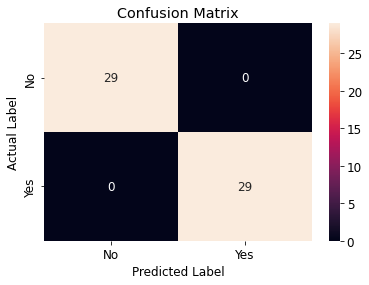

In [680]:
cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Metrics computed from a confusion matrix

 Classification Accuracy: Overall, how often is the classifier correct?

In [681]:
print((29 + 0) / float(29+29+0+0))
print(ac(y_test, y_pred))

0.5
1.0


# Misclassification Rate

In [682]:
classification_error = (0 + 1) / float(29+29+0+0)

print(classification_error)
print(1 - ac(y_test, y_pred))

0.017241379310344827
0.0


In [683]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
       Kcls, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.012
Average bias: 0.000
Average variance: 0.012
Sklearn 0-1 loss: 0.000


# Grid Search for Algorithm Tuning

In [684]:
from sklearn.model_selection import GridSearchCV

In [685]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [686]:
KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [687]:
print(grid.best_score_)
print(grid.best_params_)

0.9960000000000001
{'n_neighbors': 1}


# Visualizing Results

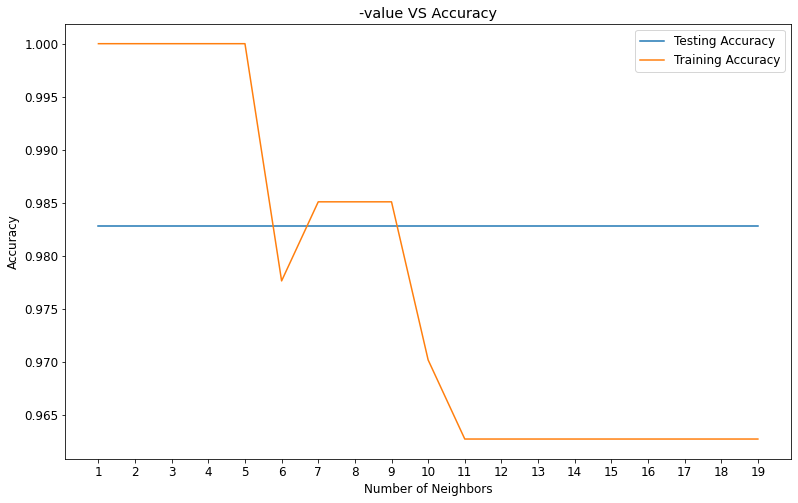

Best accuracy is 0.9827586206896551 with K = 1


In [688]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    KNN = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    KNN.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(KNN.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(KNN.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# Using Logistic Regression Classifier

In [689]:
from sklearn.linear_model import LogisticRegression

In [690]:
LR=LogisticRegression(random_state=0)

In [691]:
LR.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [692]:
y_pred=LR.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [693]:
# Accuracy Check

print('Training set score: {:.2f}%'.format(LR.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(LR.score(x_test, y_test)*100))

# Evaluation of Logistic Regression Classifer(R2Score, Mean Absoulate Error)
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

Training set score: 100.00%
Test set score: 98.28%
R2 score 0.9310344827586207
MAE 0.017241379310344827


In [694]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
       LR, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.017
Average bias: 0.017
Average variance: 0.000
Sklearn 0-1 loss: 0.017


# Naive Bayes Classifier

In [695]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score

In [696]:
# Using Gaussian Naive Bayes classifier on training data.

model_gb=GaussianNB()
model_gb.fit(x_train,y_train)
y_pred=model_gb.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [697]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)

#Predictions
y_predict = model_gb.predict(x_test)

print(cm(y_test, y_predict))

[[26  3]
 [ 0 29]]


# Accuracy Check

In [698]:
print('Training set score: {:.2f}%'.format(model_gb.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_gb.score(x_test, y_test)*100))



Training set score: 96.27%
Test set score: 94.83%


In [699]:
y_pred=model_gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.91      1.00      0.95        29

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [700]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model_gb, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.044
Average bias: 0.052
Average variance: 0.021
Sklearn 0-1 loss: 0.052


In [701]:

from sklearn.naive_bayes import MultinomialNB

In [702]:

model_Mn = MultinomialNB()


# fit the model

model_Mn.fit(x_train, y_train)


MultinomialNB()

In [703]:
print('MultinomialNB Model',report(y_test, y_pred))

MultinomialNB Model               precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.91      1.00      0.95        29

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [704]:
print('Training set score: {:.2f}%'.format(model_Mn.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_Mn.score(x_test, y_test)*100))

Training set score: 100.00%
Test set score: 98.28%


In [705]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model_Mn, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.022
Average bias: 0.017
Average variance: 0.005
Sklearn 0-1 loss: 0.052


# The Threshold level

In [706]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = model_gb.predict_proba(x_test)[0:10]

y_pred_prob

array([[1.00000000e+00, 1.41981470e-11],
       [4.19152511e-04, 9.99580847e-01],
       [1.00000000e+00, 3.50932573e-10],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.56433419e-11],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.41808977e-11],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.47375413e-11]])

In [707]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - bankruptcy(0)', 'Prob of - non-bankruptcy (1)'])

y_pred_prob_df  

,Prob of - bankruptcy(0),Prob of - non-bankruptcy (1)
0,1.000000,1.419815e-11
1,0.000419,9.995808e-01
2,1.000000,3.509326e-10
3,0.000000,1.000000e+00
4,1.000000,3.564334e-11
5,0.000000,1.000000e+00
6,1.000000,4.418090e-11
7,0.000000,1.000000e+00
8,0.000000,1.000000e+00
9,1.000000,9.473754e-11


Text(0, 0.5, 'Frequency')

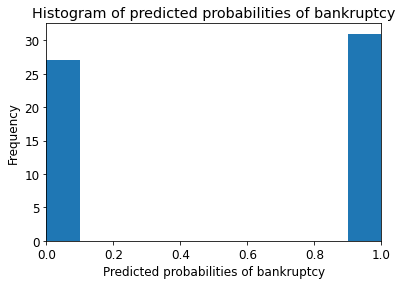

In [708]:
# store the predicted probabilities for class 0 - Probability of bankruptcy

y_pred = model_gb.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of bankruptcy')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of bankruptcy')
plt.ylabel('Frequency')

# Cross Validated ROC AUC

In [709]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model_gb, x_train,y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


# Apply 10-Fold Cross Validation

In [710]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         0.92857143 1.         0.92857143 1.         1.
 1.         0.84615385 0.92307692 1.        ]


In [711]:
# Avg. Cross Validation Score

In [712]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9626



# Decision Tree Classifier

In [713]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [714]:
model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

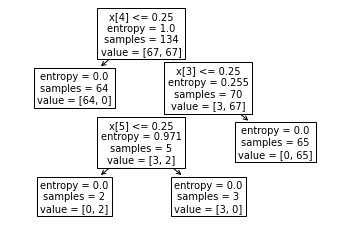

In [715]:

tree.plot_tree(model_DT);

In [716]:
col=list(df1.columns)
col

['Industrial',
 'Management',
 'Financial',
 'Credibility',
 'Competitive',
 'Operational',
 'class']

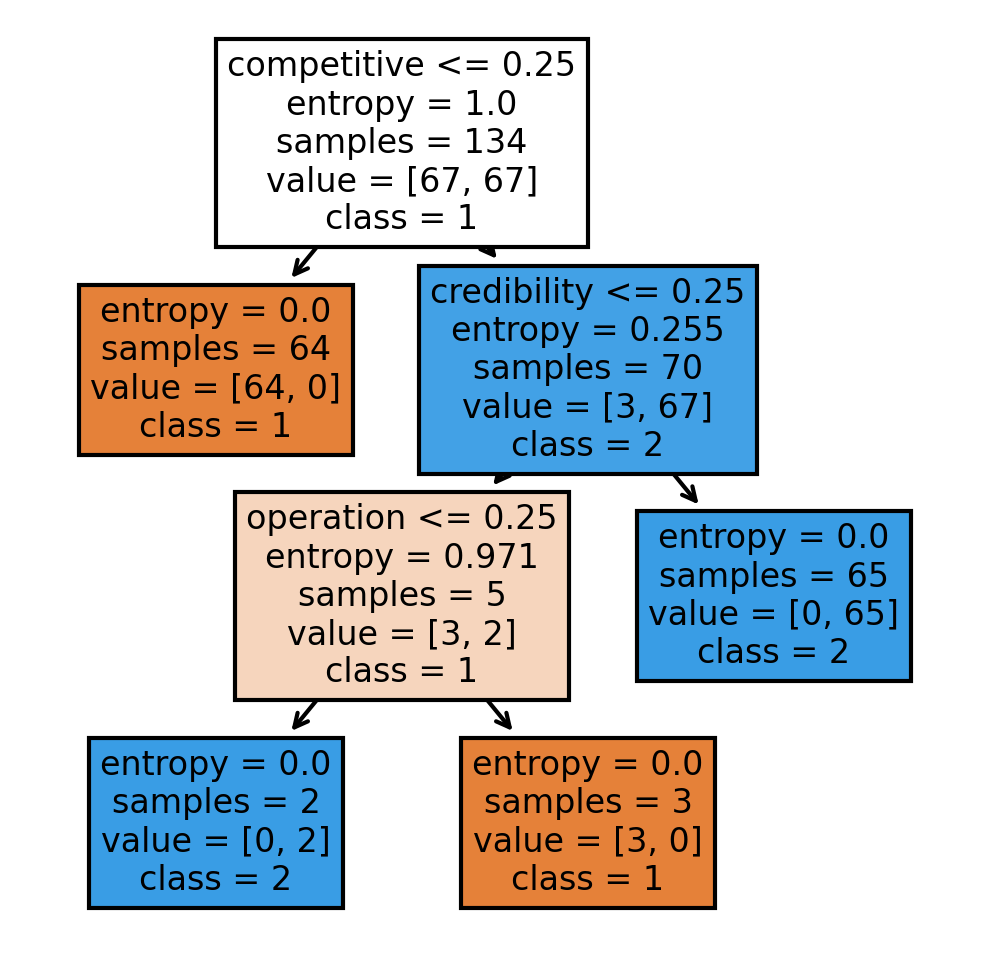

In [717]:
fn=['industrial','Mgmt','financial','credibility','competitive','operation'] # features
cn=['1', '2']                                                                # Classes
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_DT,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [718]:
y_preds=model_DT.predict(x_test)
pd.Series(y_preds).value_counts()


0    30
1    28
dtype: int64

In [719]:
y_preds

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [720]:
pd.crosstab(y_test,y_preds)

col_0,0,1
class,,
0,29,0
1,1,28


# Accuracy Check

In [721]:
print('Training set score: {:.2f}%'.format(model_DT.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_DT.score(x_test, y_test)*100))


Training set score: 100.00%
Test set score: 98.28%


In [722]:
y_preds==y_test

26      True
153     True
23      True
110     True
162     True
48      True
177     True
129     True
98      True
12      True
44      True
127     True
47      True
104     True
156     True
188     True
61      True
19      True
174     True
140     True
67      True
18      True
50      True
31      True
167     True
51      True
63      True
147     True
57      True
15      True
75      True
136     True
141     True
159     True
8       True
35      True
59      True
2       True
89      True
132     True
32      True
155     True
13      True
24      True
175     True
40      True
154     True
139     True
29      True
163     True
169     True
144     True
168     True
137     True
84     False
20      True
16      True
5       True
Name: class, dtype: bool

In [723]:
y_pred=model_DT.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [724]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model_DT, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.012
Average bias: 0.017
Average variance: 0.010
Sklearn 0-1 loss: 0.017


In [725]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [726]:
model_gini.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [727]:
y_preds=model_gini.predict(x_test)
pd.Series(y_preds).value_counts()


0    30
1    28
dtype: int64

In [728]:
y_preds

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [729]:
print('Training set score: {:.2f}%'.format(model_gini.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_gini.score(x_test, y_test)*100))


Training set score: 100.00%
Test set score: 98.28%


In [730]:
y_preds==y_test

26      True
153     True
23      True
110     True
162     True
48      True
177     True
129     True
98      True
12      True
44      True
127     True
47      True
104     True
156     True
188     True
61      True
19      True
174     True
140     True
67      True
18      True
50      True
31      True
167     True
51      True
63      True
147     True
57      True
15      True
75      True
136     True
141     True
159     True
8       True
35      True
59      True
2       True
89      True
132     True
32      True
155     True
13      True
24      True
175     True
40      True
154     True
139     True
29      True
163     True
169     True
144     True
168     True
137     True
84     False
20      True
16      True
5       True
Name: class, dtype: bool

In [731]:
y_pred=model_gini.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [732]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model_gini, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.012
Average bias: 0.017
Average variance: 0.009
Sklearn 0-1 loss: 0.017


# Decision Tree Regression Example

In [733]:
from sklearn.tree import DecisionTreeRegressor

In [734]:
model_DTR=DecisionTreeRegressor()
model_DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [735]:
print('Training set score: {:.2f}%'.format(model_DTR.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_DTR.score(x_test, y_test)*100))


Training set score: 100.00%
Test set score: 93.10%


In [736]:
y_pred=model_DTR.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.97      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [737]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model_DTR, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.012
Average bias: 0.017
Average variance: 0.010
Sklearn 0-1 loss: 0.017


# Random Forest

In [738]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [739]:
model_RF =RandomForestClassifier(n_estimators=100,max_depth =3, criterion='gini',random_state=10)
model_RF.fit(x_train,y_train)
y_predRF =model_RF.predict(x_test)

In [740]:
print(y_predRF)

[0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1]


# Accuracy Check

In [741]:
print('Training set score: {:.2f}%'.format(model_RF.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model_RF.score(x_test, y_test)*100))


Training set score: 100.00%
Test set score: 100.00%


In [742]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

1

In [743]:
y_pred=model_RF.predict(x_test)
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        29

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



# SVM with default hyperparameters

In [744]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train,y_train)


# make predictions on test set
y_pred=svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9828


In [745]:
# Build the model
model = SVC(kernel='linear', probability=True)

# fit the model
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [746]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9828


In [747]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(x_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9828


In [748]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(x_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9828


In [749]:
# Compare Train-Test Set Accuracy
y_pred_train = linear_svc.predict(x_train)

y_pred_train

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [750]:
# print the scores on training and test set

print('Training set score: {:.2f}'.format(linear_svc.score(x_train, y_train)*100))

print('Test set score: {:.2f}'.format(linear_svc.score(x_test, y_test)*100))

Training set score: 100.00
Test set score: 98.28


In [751]:
# print the classification report

print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [752]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        linear_svc, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.018
Average bias: 0.017
Average variance: 0.001
Sklearn 0-1 loss: 0.017


In [753]:
#Run SVM with polynomial kernel

In [754]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train.ravel())


# make predictions on test set
y_pred=poly_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9828


In [755]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(x_train, y_train.ravel())


# make predictions on test set
y_pred=poly_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9828


In [756]:
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc1000=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc100.fit(x_train, y_train.ravel())


# make predictions on test set
y_pred=poly_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000.0 : 0.9828


In [757]:
y_pred_train = poly_svc.predict(x_train)

y_pred_train

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [758]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(poly_svc.score(x_train, y_train)*100))

print('Test set score: {:.4f}'.format(poly_svc.score(x_test, y_test)*100))

Training set score: 100.0000
Test set score: 98.2759


In [759]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        poly_svc, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.025
Average bias: 0.017
Average variance: 0.007
Sklearn 0-1 loss: 0.017


# Run SVM with sigmoid kernel 

In [760]:
# instantiate classifier with sigmoid kernel and and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train.ravel())


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.7759


In [761]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(x_train,y_train.ravel())


# make predictions on test set
y_pred=sigmoid_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.7414


In [762]:
# instantiate classifier with sigmoid kernel and C=1000.0
sigmoid_svc100=SVC(kernel='sigmoid', C=1000.0) 


# fit classifier to training set
sigmoid_svc100.fit(x_train,y_train.ravel())


# make predictions on test set
y_pred=sigmoid_svc100.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1000.0 : 0.7414


In [763]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(sigmoid_svc.score(x_train, y_train)*100))

print('Test set score: {:.4f}'.format(sigmoid_svc.score(x_test, y_test)*100))

Training set score: 80.5970
Test set score: 77.5862


In [764]:

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        sigmoid_svc, x_train.values, y_train.values, x_test.values, y_test.values, 
        loss='0-1_loss',
        random_seed=1)

In [765]:
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.215
Average bias: 0.224
Average variance: 0.031
Sklearn 0-1 loss: 0.259


# Stratified k-fold Cross Validation with shuffle split

In [766]:
# Stratified k-Fold Cross Validation with shuffle split with linear kernel

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, x, y, cv=kfold)

In [767]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[1.   1.   0.94 1.   0.98]


In [768]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9840


In [769]:
# Stratified k-Fold Cross Validation with shuffle split with polynomial kernel




kfold=KFold(n_splits=5, shuffle=True, random_state=0)


poly_svc=SVC(kernel='poly')


poly_scores = cross_val_score(poly_svc, x, y, cv=kfold)

In [770]:
# print cross-validation scores with polynomial kernel

print('Stratified cross-validation scores with polynomial kernel:\n\n{}'.format(poly_scores))

Stratified cross-validation scores with polynomial kernel:

[0.98 1.   1.   1.   0.98]


In [771]:
# print average cross-validation score with  polynomial kernel


print('Average stratified cross-validation score with polynomial kernel:{:.4f}'.format(poly_scores.mean()))

Average stratified cross-validation score with polynomial kernel:0.9920


In [772]:
#Stratified k-Fold Cross Validation with shuffle split with rbf kernel
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, x, y, cv=kfold)

In [773]:
 # print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[1.   1.   1.   1.   0.98]


In [774]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9960


In [775]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [776]:
sgd_clf.predict(x_test)

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [777]:
scores = cross_val_score(sgd_clf, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.         1.         1.         0.96296296 1.        ]


In [778]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp( sgd_clf, x_train.values, y_train.values, x_test.values, y_test.values, loss='0-1_loss', random_seed=123)

In [779]:
print('Avg Bias: %.3f' % avg_bias)
print('Avg Variance: %.3f' % avg_var)

Avg Bias: 0.017
Avg Variance: 0.004


In [780]:
# performing predictions on the test dataset
y_pred6 =sgd_clf.predict(x_train)
y_pred7=sgd_clf.predict(x_test)  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL test: ", metrics.accuracy_score(y_train, y_pred6))
print("ACCURACY OF THE MODEL train: ", metrics.accuracy_score(y_test, y_pred7))


ACCURACY OF THE MODEL test:  0.9626865671641791
ACCURACY OF THE MODEL train:  0.9827586206896551


In [781]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred7)
print (confusion_matrix)

[[28  1]
 [ 0 29]]


In [782]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.97      1.00      0.98        29

    accuracy                           0.98        58
   macro avg       0.98      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [783]:
y_pred6=sgd_clf.predict(x)
print(y_pred6)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]


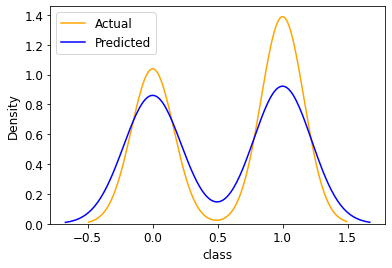

In [784]:
sns.distplot(y,hist=False,color='orange',label='Actual')
sns.distplot(y_pred7,hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [785]:
# load the model from disk
pickle.dump(sgd_clf,open('C:\\Users\\VivekG\\test.pkl','wb'))
pickle_model=pickle.load(open('C:\\Users\\VivekG\\test.pkl','rb'))

pickle_out = open("test.pkl","wb")
pickle.dump(sgd_clf, pickle_out)
pickle_out.close()


pickle_model.score(x_test, y_test)

0.9827586206896551

In [786]:
sgd_clf.predict

<bound method LinearClassifierMixin.predict of SGDClassifier(random_state=42)>